In [2]:
import numpy
import py_entropy
from matplotlib import pyplot

from tqdm.notebook import tqdm

In [6]:
%%time

k = 2000
ne = 1000
n = 50

s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)

state_locs = s.get_enumerated_states()
D = len(state_locs)

states = numpy.zeros((k//2, ne, D), dtype=numpy.complex128)
for i in tqdm(range(0,k//2)):
    s.apply_alternative_layers(2)
    states[i,:,:] = s.get_state()[1][:,0,:]

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 1min 12s, sys: 7.81 s, total: 1min 19s
Wall time: 16 s


In [14]:
occs = numpy.zeros((k//2, n), dtype=numpy.float64)

per_k_probs = (numpy.abs(states)**2).mean(axis=1)
for k, k_probs in enumerate(per_k_probs):
    for (i,j), p in zip(state_locs, k_probs):
        occs[k, i] += p
        occs[k, j] += p

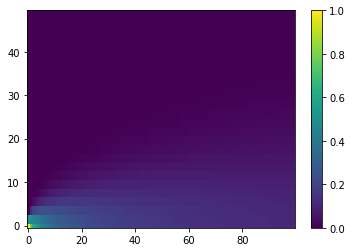

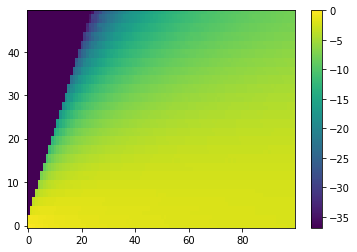

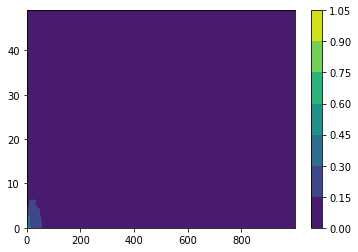

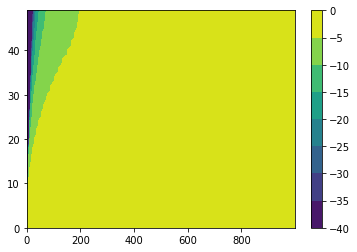

In [71]:
pyplot.imshow(occs.T[:,:100], interpolation='none', aspect='auto',origin='lower')
pyplot.colorbar()
pyplot.show()

pyplot.imshow(numpy.log(occs.T[:,:100] + 1e-16), interpolation='none', aspect='auto',origin='lower')
pyplot.colorbar()
pyplot.show()

pyplot.contourf(occs.T)
pyplot.colorbar()
pyplot.show()

pyplot.contourf(numpy.log(occs.T + 1e-16))
pyplot.colorbar()
pyplot.show()

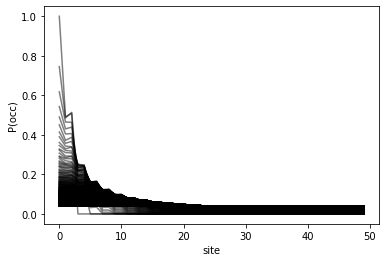

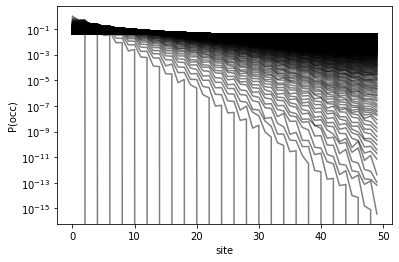

In [60]:
for k_state in occs:
    pyplot.plot(k_state, c='black', alpha=0.5)
pyplot.xlabel('site')
pyplot.ylabel('P(occ)')
pyplot.show()

for k_state in occs:
    pyplot.plot(k_state, c='black', alpha=0.5)
pyplot.yscale('log')
pyplot.xlabel('site')
pyplot.ylabel('P(occ)')
pyplot.show()

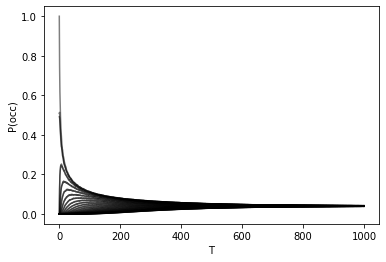

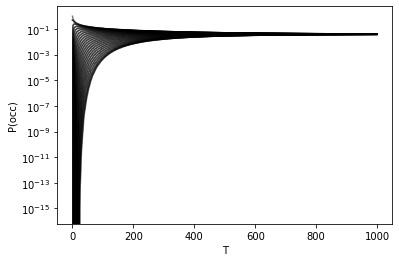

In [62]:
for i in range(n):
    pyplot.plot(occs[:,i], c='black', alpha=0.5)
pyplot.ylabel('P(occ)')
pyplot.xlabel('T')    
pyplot.show()


for i in range(n):
    pyplot.plot(occs[:,i], c='black', alpha=0.5)
pyplot.yscale('log')
pyplot.ylabel('P(occ)')
pyplot.xlabel('T')    
pyplot.show()

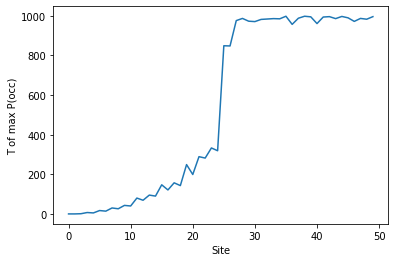

In [64]:
pyplot.plot(numpy.argmax(occs, axis=0))
pyplot.ylabel('T of max P(occ)')
pyplot.xlabel('Site')
pyplot.show()